Project:
Business Objective:
A combined-cycle power plant comprises gas turbines, steam turbines, and heat recovery steam generators. In this type of plant, the electricity is generated by gas and steam turbines combined in one cycle. Then, it is transferred from one turbine to another. We have to model the energy generated as a function of exhaust vacuum and ambient variables and use that model to improve the plant's performance. 
Data Set Details: 
This is a project where the variable to be predicted is energy production
The data file contains 9568 observations with five variables collected from a combined cycle power plant over six years when the power plant was set to work with a full load. 

The variables, or features, are the following:
temperature, in degrees Celsius.
exhaust_vacuum, in cm Hg.
amb_pressure, in millibar. (Ambient pressure)
r_humidity, in percentage. (Relative humidity)
energy_production, in MW, net hourly electrical energy output.

Acceptance Criterion: Need to deploy the end results using Flask /Streamlit etc
Milestones:



In [ ]:
pip install pandas numpy joblib scikit-learn

In [ ]:
pip install xgboost


In [4]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib


In [18]:
# Load the dataset
file_path = 'C:\\Jupyter_notebook\\Copy of energy_production (1).xlsx'
data = pd.read_excel(file_path)

# Display the first few rows
print(data.head())

# Display the shape of the data (rows, columns)
print(f"Dataset Shape: {data.shape}")

# Check for missing values in each column
print(data.isnull().sum())

# Summary statistics for all numerical columns
print(data.describe())

# Check data types of all columns
print(data.dtypes)


   temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0         9.59           38.56       1017.01       60.10             481.30
1        12.04           42.34       1019.72       94.67             465.36
2        13.87           45.08       1024.42       81.69             465.48
3        13.72           54.30       1017.89       79.08             467.05
4        15.14           49.64       1023.78       75.00             463.58
Dataset Shape: (9568, 5)
temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64
       temperature  exhaust_vacuum  amb_pressure   r_humidity  \
count  9568.000000     9568.000000   9568.000000  9568.000000   
mean     19.651231       54.305804   1013.259078    73.308978   
std       7.452473       12.707893      5.938784    14.600269   
min       1.810000       25.360000    992.890000    25.560000   
25%      13.510000       41.740000   1009.100000    63.327500   
5

In [19]:
# Detect outliers using Z-score method
z_scores = stats.zscore(data[['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_cleaned = data[filtered_entries]

# After cleaning, check again for missing values
data_cleaned = data_cleaned.dropna(subset=['energy_production'])
print(data_cleaned)

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9510 rows x 5 columns]


In [20]:
# Define features and target variable
X = data_cleaned[['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']]
y = data_cleaned['energy_production']

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


          feature        VIF
0     temperature  39.402589
1  exhaust_vacuum  74.915215
2    amb_pressure  67.035434
3      r_humidity  40.981705


In [21]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'])
scaled_data['energy_production'] = y.reset_index(drop=True)


In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_data.drop('energy_production', axis=1), 
                                                    scaled_data['energy_production'], 
                                                    test_size=0.2, 
                                                    random_state=42)


In [23]:
# Train and evaluate Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Model evaluation for Linear Regression
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R² Score: {r2}")

# Train and evaluate Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")

# Train and evaluate Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Evaluate Gradient Boosting model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"Gradient Boosting MSE: {mse_gbr}")
print(f"Gradient Boosting R² Score: {r2_gbr}")

# Train and evaluate XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R² Score: {r2_xgb}")


Linear Regression MSE: 20.519066666032693
Linear Regression R² Score: 0.9292262426205224
Random Forest MSE: 10.839885519327044
Random Forest R² Score: 0.9626113877276808
Gradient Boosting MSE: 14.505278669952284
Gradient Boosting R² Score: 0.9499688221682939
XGBoost MSE: 9.476970218056351
XGBoost R² Score: 0.967312314842489


In [24]:
# Summary of all models
print(f"Linear Regression: MSE = {mse}, R² = {r2}")
print(f"Random Forest: MSE = {mse_rf}, R² = {r2_rf}")
print(f"Gradient Boosting: MSE = {mse_gbr}, R² = {r2_gbr}")
print(f"XGBoost: MSE = {mse_xgb}, R² = {r2_xgb}")



Linear Regression: MSE = 20.519066666032693, R² = 0.9292262426205224
Random Forest: MSE = 10.839885519327044, R² = 0.9626113877276808
Gradient Boosting: MSE = 14.505278669952284, R² = 0.9499688221682939
XGBoost: MSE = 9.476970218056351, R² = 0.967312314842489


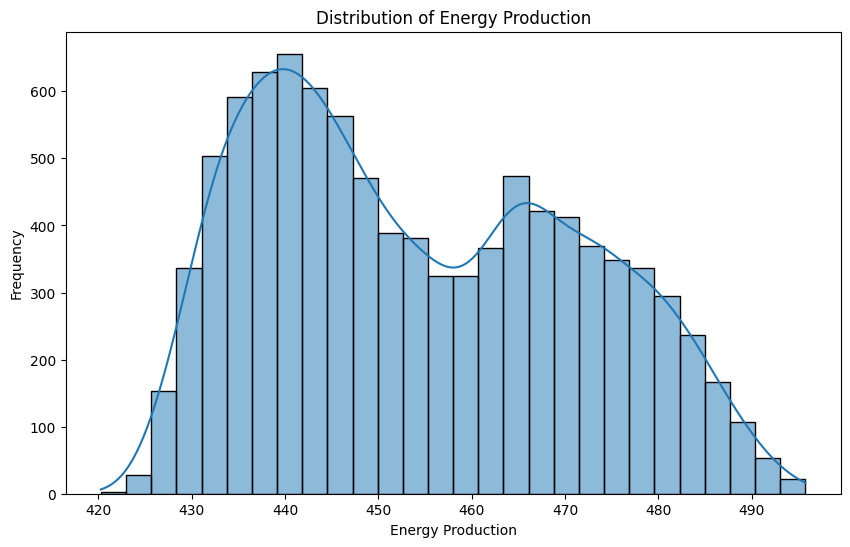

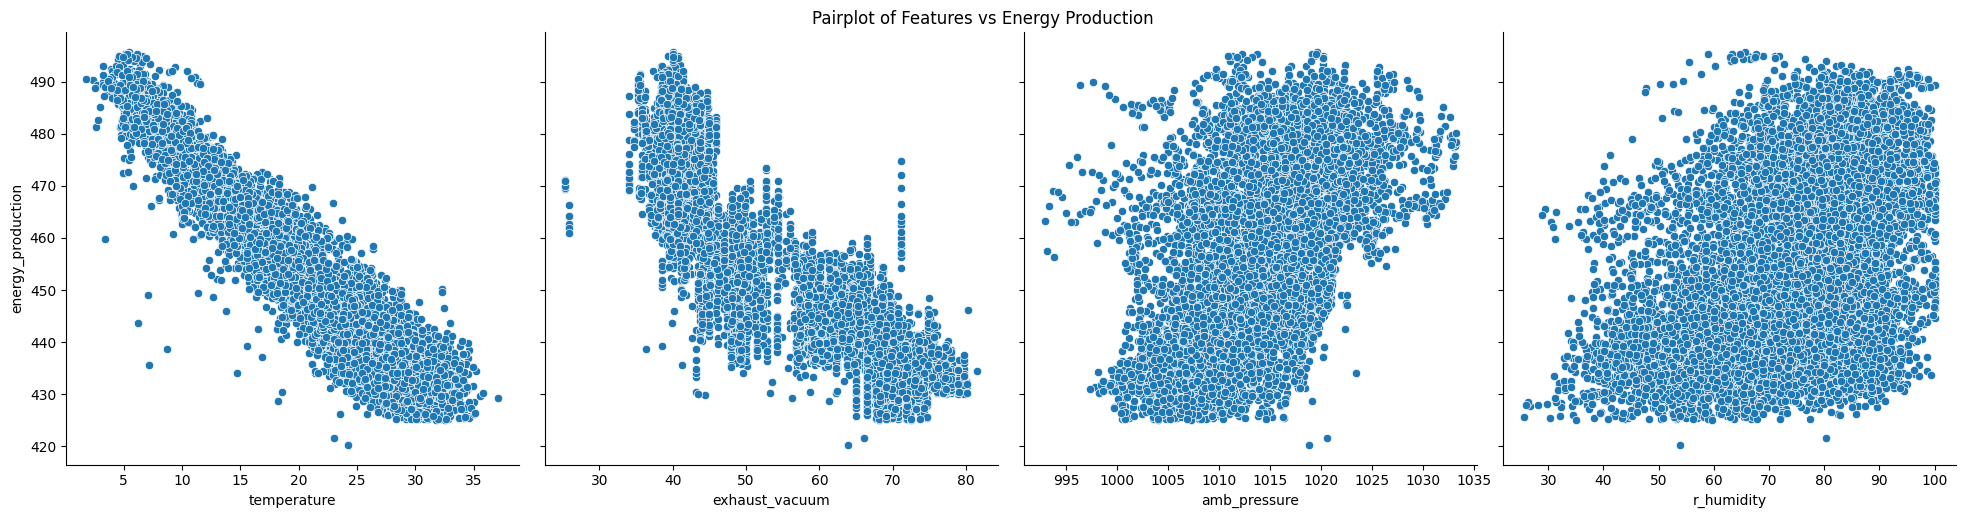

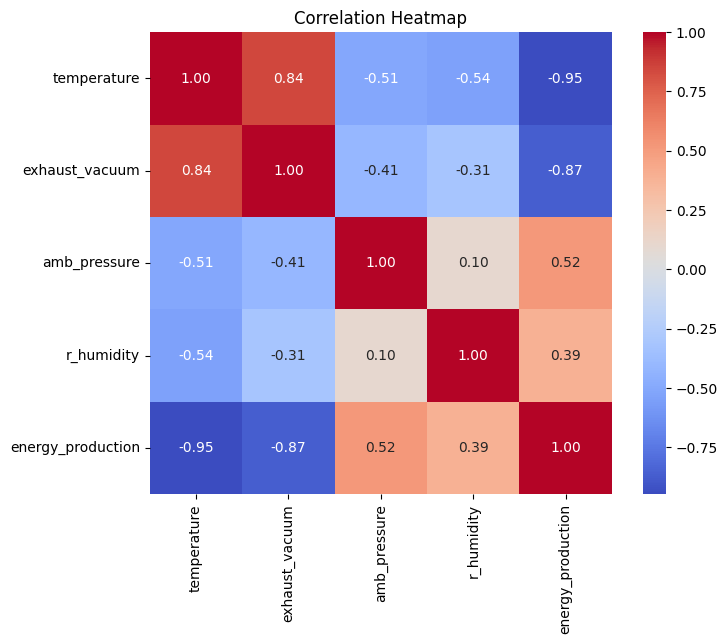

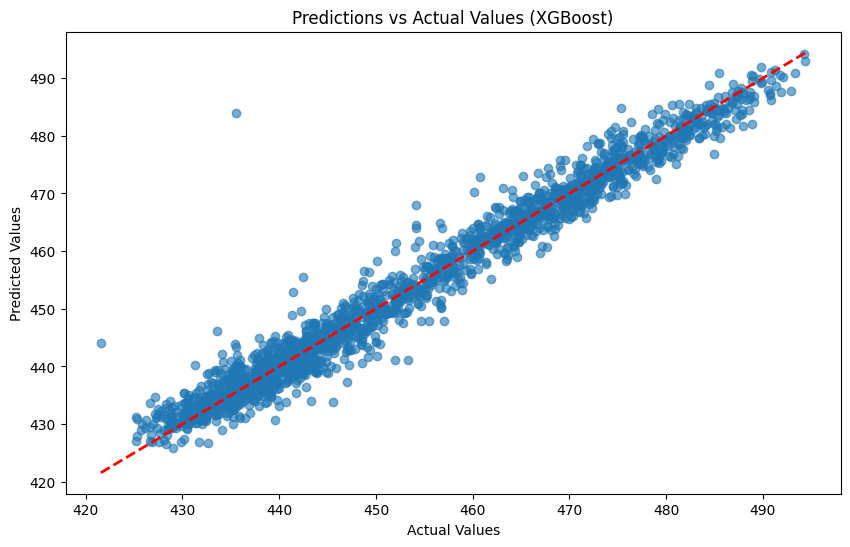

In [25]:
# EDA: Visualizing the distribution of energy production
plt.figure(figsize=(10, 6))
sns.histplot(data['energy_production'], kde=True)
plt.title('Distribution of Energy Production')
plt.xlabel('Energy Production')
plt.ylabel('Frequency')
plt.show()

# EDA: Pairplot to visualize relationships between features
sns.pairplot(data, x_vars=['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'], 
             y_vars='energy_production', height=5, aspect=1, kind='scatter')
plt.suptitle('Pairplot of Features vs Energy Production', y=1.02)
plt.show()

# EDA: Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Plotting Predictions vs Actual for the best model (XGBoost as an example)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)  # Diagonal line
plt.title('Predictions vs Actual Values (XGBoost)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [26]:
# Compare model performance and dynamically select the best model
model_performance = {
    'Linear Regression': {'MSE': mse, 'R²': r2},
    'Random Forest': {'MSE': mse_rf, 'R²': r2_rf},
    'Gradient Boosting': {'MSE': mse_gbr, 'R²': r2_gbr},
    'XGBoost': {'MSE': mse_xgb, 'R²': r2_xgb}
}

# Find the model with the highest R² score
best_model_name = max(model_performance, key=lambda model: model_performance[model]['R²'])
print(f"Best model: {best_model_name} with R² score: {model_performance[best_model_name]['R²']}")


Best model: XGBoost with R² score: 0.967312314842489


In [28]:
# Save the best model to disk using joblib
joblib.dump(xgb_model, r'C:\Users\Shree\Downloads\energy\energy\best_energy_model.pkl')
print("Best model saved to disk.")


Best model saved to disk.


In [1]:
pip install --upgrade streamlit


  Using cached streamlit-1.39.0-py2.py3-none-any.whl.metadata (8.5 kB)
Using cached streamlit-1.39.0-py2.py3-none-any.whl (8.7 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Shree\\AppData\\Local\\Programs\\Python\\Python312\\Scripts\\streamlit.exe' -> 'C:\\Users\\Shree\\AppData\\Local\\Programs\\Python\\Python312\\Scripts\\streamlit.exe.deleteme'
Consider using the `--user` option or check the permissions.

